# Procesamiento de Imágenes - Trabajo Práctico N°4
## Grupo 3
* Santiago Arribere
* Matías Francois
* Joaquín Gaytan
* Pablo Scheinfeld

# Ejercicio 1

El objetivo del presente ejercicio es realizar transformaciones sobre la imagen lenagray.tif (incluida en la carpeta assets del proyecto). En mayor detalle, las transformaciones a ejecutar son la obtención del negativo de la imagen y la conversión de los valores que se encuentren en el rango de 0,25 a 0.5 al rango de 0 a 1. A fin efectuar dichas transformaciones se propone implementar en Python la función imadjust de Matlab y hacer uso de ella posteriormente.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import sys
# Add the folder path to the sys.path list
sys.path.append('../../src/helpers/')
from compare_images import compare_images
from plot_histogram import plot_histogram

## Función imadjust

Con el fin de ajustar los valores de intensidad en una imagen se puede utilizar la función imadjust de Matlab, donde se especifica el rango de los valores de entrada y los valores de salida. La función imadjust asigna los valores inferiores de entrada a los inferiores de salida y análogamente para los valores superiores. Por defecto, los valores de entrada se mapean linealmente a los valores de salida. Sin embargo, se puede aceptar un argumento adicional que especifica el factor de corrección gamma. Dependiendo del valor de gamma, el mapeo entre los valores de las imágenes de entrada y salida puede ser no lineal. A lo largo de este ejercicio, se trabaja únicamente con  $\gamma = 1$ (transformación lineal).

![](../../assets/ej1/gamma.png)

Con $\gamma = 1$, la recta que describe a la transformación es: $$ y = \frac{top - bottom}{high - low} \cdot (x - low) + bottom $$


Teniendo en cuenta $\gamma$ la ecuación resulta: $$ y = (\frac{x - low}{high - low}) ^ \gamma \cdot (top - bottom) + bottom $$


Dicha transformación se debe aplicar únicamente a los valores de x que se encuentren entre low y high. Para el resto de valores, estos serán mapeados a bottom y top tal como se indica en el diagrama anterior.

In [2]:
def imadjust(image, low_in, high_in, low_out, high_out, gamma = 1):
    # [Parámetro]:[Significado anterior]
    # low_in: low
    # low_out: top
    # high_in: high
    # high_out: top

    # Normalización
    new_image = image.copy()/255    
    
    # Definición de máscaras.
    mask_transf = np.bitwise_and(low_in<new_image, new_image<=high_in)    # Valores entre low_in y high_in..
    mask_low = low_in >= new_image      # Valores menores a low_in. Se mapearán a low_out.
    mask_high = new_image > high_in    # Valores mayores a high_in. Se mapearán a high_out.

    # Transformación
    new_image[mask_low] = low_out
    new_image[mask_transf] = (((new_image[mask_transf] - low_in)/(high_in - low_in)) ** gamma) * (high_out - low_out) + low_out  #Transformación
    new_image[mask_high] = high_out

    # Límites
    new_image[new_image > 1] = 1
    new_image[new_image < 0] = 0

    # Denormalización
    new_image *= 255
    new_image = np.array(np.round(new_image,decimals=0), dtype=np.uint8)
    
    return new_image

### Prueba

Para probar el funcionamiento de la función imadjust implementada, se utiliza con una imagen de una escala de grises y se muestra su histograma.

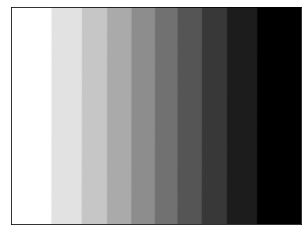

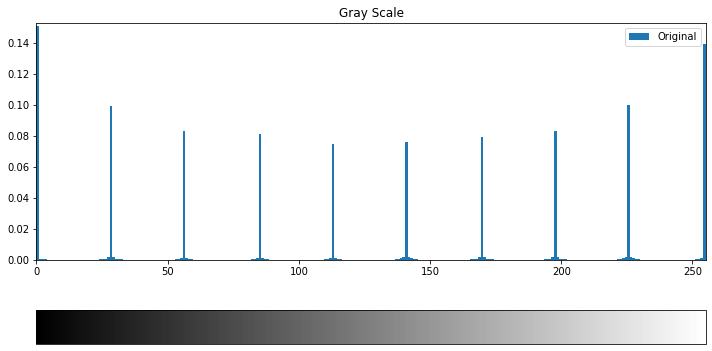

In [3]:
degrade = np.array(Image.open('../../assets/ej1/grayscale.jpg'))  # Open and normalize
fig=plt.imshow(degrade, cmap='gray')
ax=plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()
_ = plot_histogram(degrade, title='Gray Scale')

#### Negativo

Al obtener el negativo de la imagen, se espera que visualmente la escala de grises se invierta. Asimismo, dado que la imagen es simétrica, el histograma no debería ser modificado.

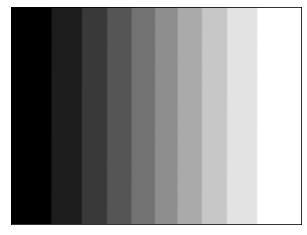

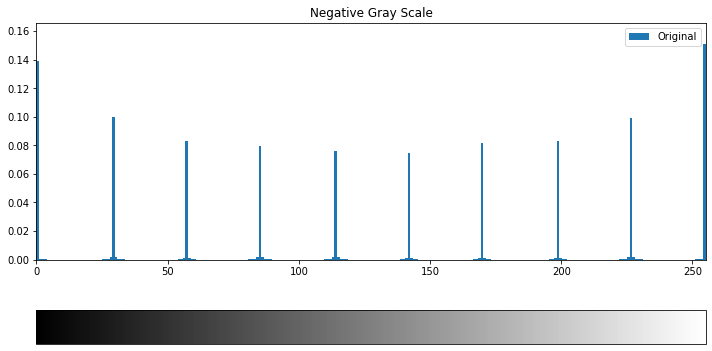

In [4]:
degrade_inv = imadjust(degrade,0,1,1,0)
fig=plt.imshow(degrade_inv,cmap='gray')
ax=plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

_ = plot_histogram(degrade_inv, title='Negative Gray Scale')

Evidentemente, la función transformó a la imagen obteniendo correctamente su negativo.

#### Reducción del rango de salida

A continuación, se realiza una transformación del rango de 0 a 1 al rango de 0,3 a 0,7. Al realizar esto, los valores serán mapeados a un rango más pequeño, provocando una pérdida de contraste y una imagen sin blancos ni negros absolutos. A su vez, se espera que el histograma mantenga su forma pero en una región más reducida.

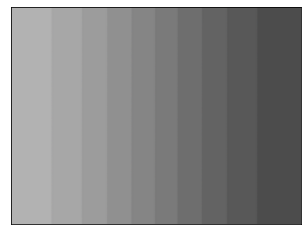

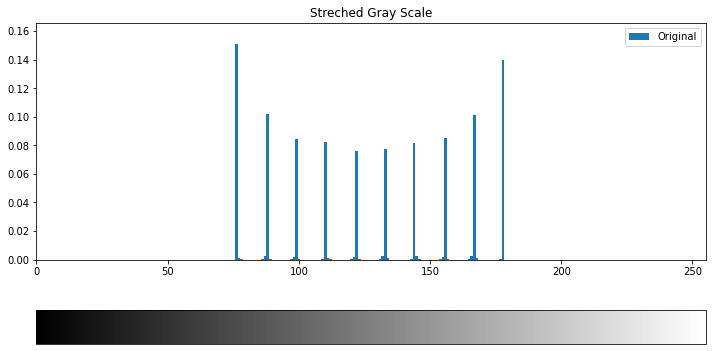

In [5]:
strech_deg = imadjust(degrade,0,1,0.3,0.7)
fig=plt.imshow(strech_deg,cmap='gray')
ax=plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

_ = plot_histogram(strech_deg, title='Streched Gray Scale')

Tanto en la imagen como en el histograma enseñados, lo obtenido coincide con lo esperado al realizar la transformación. 

### Aumento del rango de salida

Por último, se busca invertir lo realizado anteriormente transformando la imagen de un rango de 0,3 a 0,7 a uno de 0 a 1. Así, se espera que el espectro mantenga su forma pero sea ensanchado al rango original, provocando un aumento del contraste y la obtención de la imagen original.

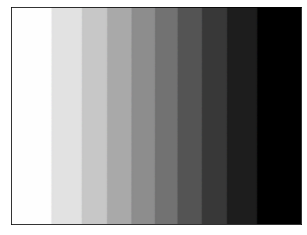

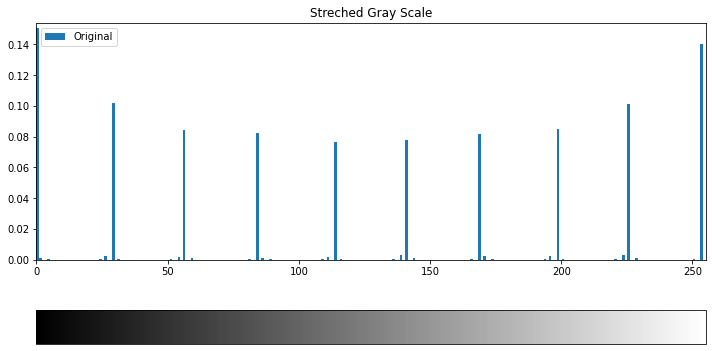

In [6]:
reg_deg = imadjust(strech_deg,0.3,0.7,0,1)
fig=plt.imshow(reg_deg,cmap='gray')
ax=plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

_ = plot_histogram(reg_deg, title='Streched Gray Scale')

Como conclusión de esta etapa, se observa que la imagen original fue recuperada adecuadamente. En todos los casos probados, la función imadjust se comportó de acuerdo a lo esperado. Por esta razón, se considera que funciona adecuadamente y se procede a realizar el ejercicio planteado.

## Lena

In [7]:
lena_image = np.array(Image.open('../../assets/ej1/lenagray.tif'))  # Open and normalize

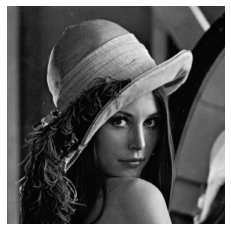

In [8]:
plt.axis('off')
plt.imshow(lena_image, cmap='gray')
plt.show()

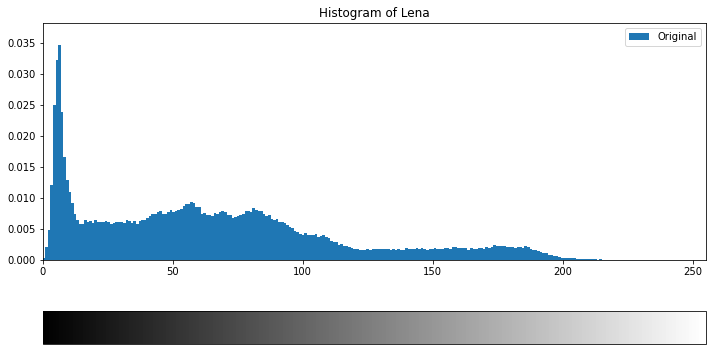

In [9]:
_ = plot_histogram(lena_image, title='Histogram of Lena')

## Negativo

La primera transformación a realizar es obtener el negativo de la imagen original. Para ello, se debe aplicar una transformación cuya función corresponde a la de una recta decreciente entre 0 y 1 con pendiente 1.

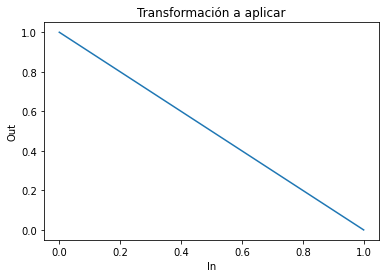

In [10]:
plt.plot([0,1], [1,0])
plt.title('Transformación a aplicar')
plt.xlabel('In')
plt.ylabel('Out')
plt.show()

In [11]:
neg_lena = imadjust(lena_image,0,1,1,0)

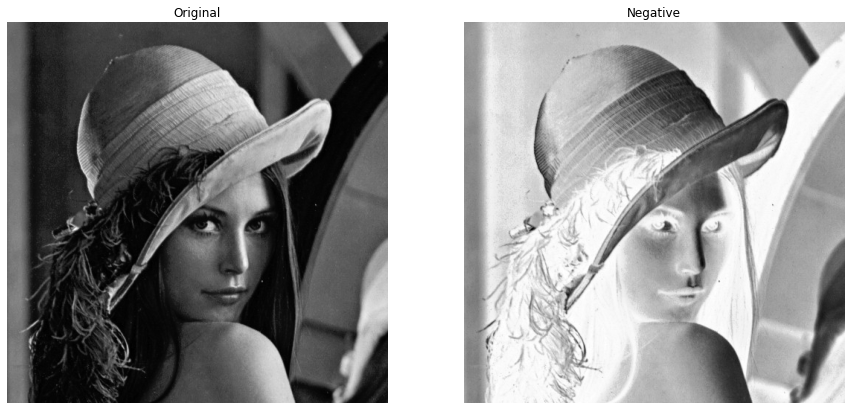

In [12]:
compare_images([lena_image, neg_lena], ['Original','Negative'])

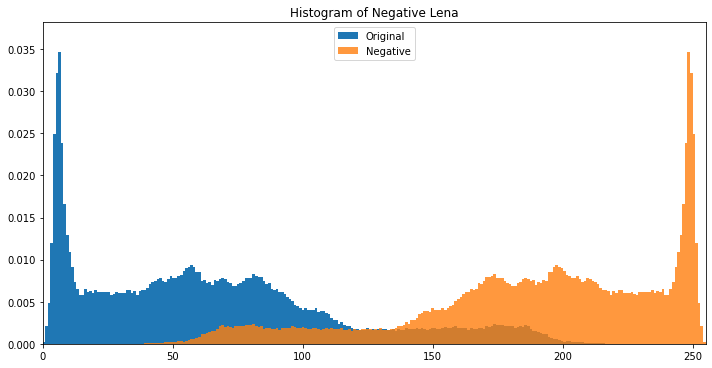

In [13]:
_ = plot_histogram(lena_image,new_image=neg_lena, title='Histogram of Negative Lena', new_label='Negative', showColorBar = False)

En el histograma mostrado se puede apreciar como los valores de la imagen original fueron negados. Es decir, se mantuvo su forma original pero fue invertido horizontalmente. Luego de la transformación, los valores más claros de la imagen pasaron a ser los más oscuros y viceversa. Esto corresponde a lo observado en la imagen, donde, como ejemplo, el negro pasó a representarse como blanco, el gris oscuro como gris claro y el blanco como negro.

## Conversión de valores

En este caso se busca transformar el rango de valores [0.25 0.5] al rango [0 1].

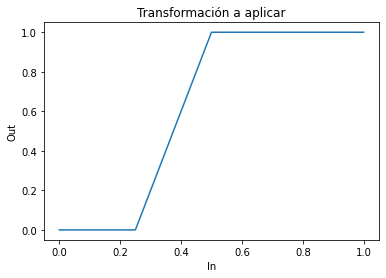

In [14]:
plt.plot([0,0.25,0.5,1], [0,0,1,1])
plt.title('Transformación a aplicar')
plt.xlabel('In')
plt.ylabel('Out')
plt.show()

In [15]:
converted_lena = imadjust(lena_image,0.25,0.5,0,1)

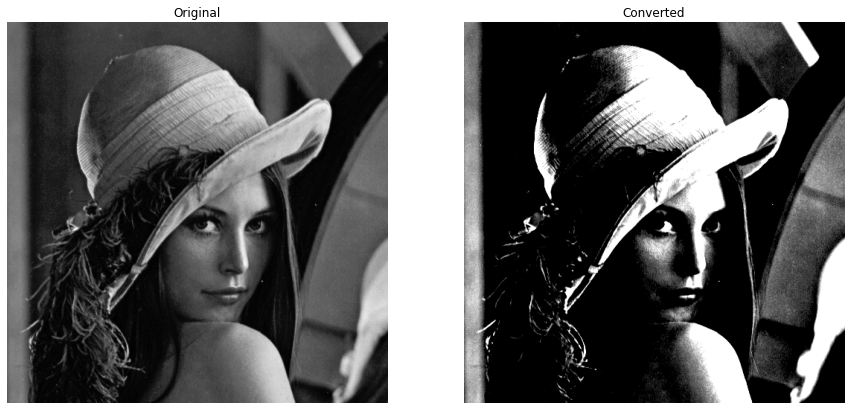

In [16]:
compare_images([lena_image, converted_lena], ['Original','Converted'])

La imagen obtenida presenta mucho mayor contraste que la imagen original. Además, la cantidad de valores intermedios disminuyó significativamente mientras que los valores de negro y blanco absolutos aumentaron considerablemente. Con la finalidad de comprobar dicho análisis se enseña a continuación el histograma.

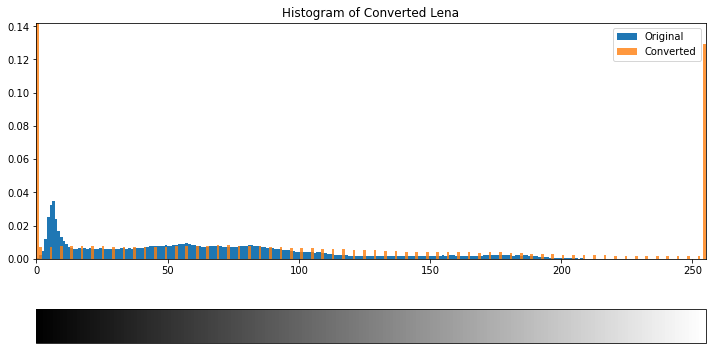

In [17]:
_ = plot_histogram(lena_image,new_image=converted_lena, title='Histogram of Converted Lena', new_label='Converted')

En el nuevo histograma se puede analizar que existen dos picos en los valores de 0 y 255. Estos picos se deben al mapeo que se realiza de los valores por fuera del intervalo entre el mínimo y el máximo de entrada de la transformación aplicada. Los valores que no se encuentren en este rango se mapean al valor mínimo y máximo de salida (en este caso 0 y 1, los cuales son valores normalizados, respectivamente). Visualmente esto se aprecia como un mayor contraste en la imagen.

A continuación se presenta el histograma excluyendo los valores de 0 y 255.

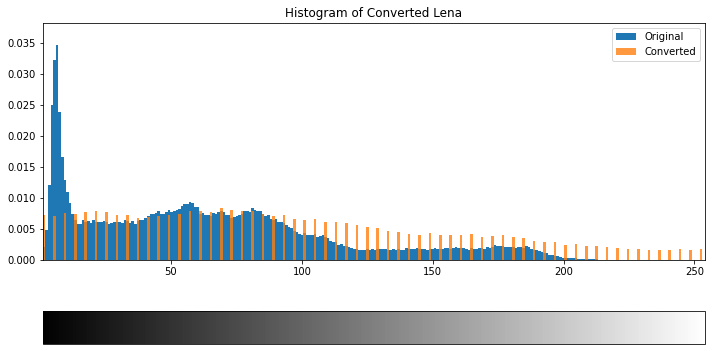

In [18]:
_ = plot_histogram(lena_image,new_image=converted_lena, title='Histogram of Converted Lena', new_label='Converted', xlim=(1,254))

Analizando el diagrama anterior, se aprecia que los valores de la nueva imagen se encuentran más esparcidos en el eje horizontal. La razón que lo explica es que solamente se encuentran entre 0 y 1 (sin incluirlos) los valores que en la imagen original se encontraban en el rango de 0,25 a 0,5, resultando en una cantidad menor de valores.

Por otro lado, la forma que toma el histograma de la nueva imagen corresponde a la forma del histograma original entre 0,25 y 0,5 (mostrado a continuación).

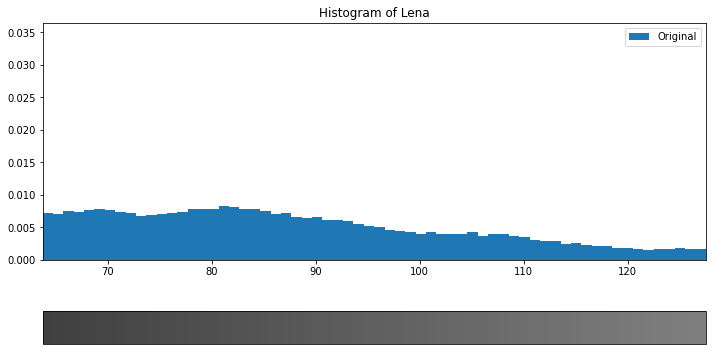

In [19]:
_ = plot_histogram(lena_image, title='Histogram of Lena', xlim=(0.25*255,0.5*255), correctY = False)

### Conclusión

Para finalizar, en el ejercicio realizado se realizaron dos transformaciones sobre la imagen Lena original. En primer lugar, se obtuvo el negativo de la imagen y, en segundo lugar, se realizó una transformación de los valores en el rango de 0,25 a 0,5 al rango de 0 a 1. En ambos casos lo obtenido correspondió con lo esperado y se contrastaron los histogramas de las imágenes resultantes con el de la imagen original.